Q1. Montrer qu'en vertu des équations de Maxwell considérées, le champ magnétique obéit à une équation de diffusion.

Partons des équations de Maxwell

\begin{equation}
\vec{\nabla} \times \vec{E} = -\partial_{t}\vec{B}
\end{equation}

\begin{equation}
\vec{\nabla} \times \vec{B} = \mu \vec{J}
\end{equation}

\begin{equation}
\vec{\nabla} \cdot \vec{B} = 0
\end{equation}

On peut en déduire que 

\begin{equation}
\vec{E} = \dfrac{1}{\mu \sigma}\vec{\nabla} \times \vec{B}
\end{equation}

Il nous reste à résoudre 
\begin{equation}
\vec{\nabla}\times\left(\vec{\nabla} \times \vec{B}\right) = -\mu \sigma \partial_{t}\vec{B}
\end{equation}

Calculons 
\begin{equation}
\vec{\nabla}\times\left(\vec{\nabla} \times \vec{B}\right)
\end{equation}

\begin{equation}
\left(\vec{\nabla}\times\left(\vec{\nabla} \times \vec{B}\right)\right)_{i} = \epsilon_{ijk}\partial_{j}\left(\vec{\nabla} \times \vec{B}\right)_{k}
\end{equation}


\begin{equation}
\left(\vec{\nabla}\times\left(\vec{\nabla} \times \vec{B}\right)\right)_{i} = \epsilon_{ijk}\partial_{j}\epsilon_{klm}\partial_{l} B_{m}
\end{equation}

\begin{equation}
\left(\vec{\nabla}\times\left(\vec{\nabla} \times \vec{B}\right)\right)_{i} = \epsilon_{kij}\epsilon_{klm}\partial_{j}\partial_{l} B_{m}
\end{equation}

\begin{equation}
\left(\vec{\nabla}\times\left(\vec{\nabla} \times \vec{B}\right)\right)_{i} = \left(\delta_{il}\delta_{jm}-\delta_{im}\delta_{jl}\right)\partial_{j}\partial_{l} B_{m}
\end{equation}

\begin{equation}
\left(\vec{\nabla}\times\left(\vec{\nabla} \times \vec{B}\right)\right)_{i} = \delta_{il}\delta_{jm}\partial_{j}\partial_{l} B_{m} - \delta_{im}\delta_{jl}\partial_{j}\partial_{l} B_{m}
\end{equation}

\begin{equation}
\left(\vec{\nabla}\times\left(\vec{\nabla} \times \vec{B}\right)\right)_{i} = \partial_{i}\partial_{j} B_{j} - \partial_{j}\partial_{j} B_{i} 
\end{equation}


\begin{equation}
\vec{\nabla}\times\left(\vec{\nabla} \times \vec{B}\right) = \vec{\nabla}\left(\vec{\nabla}\cdot\vec{B}\right)- \Delta\vec{B}
\end{equation}

Or par une loi de Maxwell: 

\begin{equation}
\vec{\nabla} \cdot \vec{B} = 0
\end{equation}

Donc je trouve : 
\begin{equation}
\Delta\vec{B} = \mu \sigma \partial_{t}\vec{B}
\end{equation}

Le champ magnétique obéit bien à une équation de diffusion

La situation étant invariante par le groupe des translations et symétries axiales parallèles à l'axe $z$, on a partout $J\perp\vec{u_z}$. Entre autre, on a $B_x=B_y\equiv 0$. Il suffira donc de calculer l'évolution de $B_z$ par l'équation
\begin{equation}
\Delta B_z = \mu \sigma \partial_{t} B_z
\end{equation}

Q2. Quelles sont les conditions aux bords pour le champ magnétique dans la configuration choisie?

Condition de Dirichlet sur le bord exterieur :
Calcul de B_zbord par la loi d'Ampère

\begin{equation}
\vec{\nabla} \times \vec{B} = \mu \vec{J}
\end{equation}

\begin{equation}
= \int\!\!\!\!\!\int_{S} \left(\vec{\nabla} \times \vec{B}\right) \, \cdot \mathrm{d}\vec{S} = \oint_{\partial{S}} \vec{B}\cdot d\vec{l}
\end{equation}

\begin{equation}
B_{z,bord} = -\mu J
\end{equation}

Condition sur le bord intérieur :
Regardons aux parois intérieures parallèles à $\vec{u_x}$. La constante $\sigma$ étant infinie dans le supraconducteur, l'équation de diffusion nous indique que $B$ y sera constant et donc identiquement nul. Il suit que $J$ et donc $E$ sont également nuls dans ce milieu. Rappelons que $E_{\parallel}$ est continu, on en déduit que $E = E_{\perp}$ et dès lors que $J = \frac 1\sigma E \propto \vec{u_y}$ à proximité de ces parois. Finalement, en calculant le rotationnel de $B$ près de ces bords intérieurs, on obtient
\begin{equation}
(\partial_y B_z, -\partial_x B_z,0) = \mu \vec{J} \propto \vec{u_y}  
\end{equation}
Et donc la condition de Neumann $\partial_y B_z = 0$. De même, sur les bords parallèles à $\vec{u_y}$, on a la condition $\partial_x B_z=0$.

In [97]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [98]:
#paramètres
mu = 1.26*10**-6 #N/A
sigma = 5.96*10**7 #S/m
J = 1 #A/m^2
alpha = 1/(mu*sigma)
dx = 0.000125 #m
dy = 0.000125
dt = 2.5*10**-7 #sec #on pourrait 
#donc dire que ce choix de dt donne des résultats normaux 
#donc n'est pas un mauvais choix. 
#On pourrait pousser vers des dt plus petits pour montrer que cela ne change pas le comportement 
#par rapport à ce qu'on a déjà
T = 1.25*10**-2 #sec

In [99]:
N = 40 #taille d'un bloc de la matrice
nt = int(T/dt)
B_zbord = -mu*J

Q3. Calculer l'évolution au cours du temps du champ magnétique par la méthode d'Euler (forward) dans le temps, et avec une discrétisation centrée d'ordre 2 pour le laplacien.

In [100]:
def Md(Bn): # Md prend la donnée du champs B_z en un temps t et renvoie B_z en t+dt.
        
    Md= Bn.copy() 
    # On calcule le Laplacien.
    Md[1:-1,1:-1]= Bn[1:-1,1:-1] + alpha*\
            (dt/dy**2 * (Bn[2:,1:-1] - 2*Bn[1:-1,1:-1] + Bn[:-2,1:-1]) +\
             dt/dx**2 * (Bn[1:-1,2:] - 2*Bn[1:-1,1:-1] + Bn[1:-1,:-2]))
            
    # On force les conditions de Neumann sur le bord intérieur.        
    Md[N+1:2*N,N+1] = Md[N+1:2*N,N] 
    Md[N+1,N+1:2*N] = Md[N,N+1:2*N]
    Md[N+1:2*N,2*N-1] = Md[N+1:2*N,2*N]
    Md[2*N-1,N+1:2*N] = Md[2*N,N+1:2*N]
    
    # On évite la propagation du champs à l'intérieur du supraconducteur.
    Md[N+2:2*N-2,N+2:2*N-2] = numpy.zeros((N-4,N-4))
    
    return Md

In [101]:
B = numpy.zeros((3*N+1, 3*N+1, nt+1))

# On fixe les condtions de Dirichlet
B[:,0,:] = B_zbord
B[0,:,:] = B_zbord
B[-1,:,:] = B_zbord
B[:,-1,:] = B_zbord

# On calcule l'évolution comme demandé.
for i in range(nt):
    B[:, :, i+1] = Md(B[:, :, i])

# B[N+2:2*N-2,N+2:2*N-2,:] = numpy.zeros((N-4,N-4,nt+1))

Q5. Que vaut, à l'instant  $t=1.25 \cdot 10^{-3}\mathrm s$, la valeur du champ magnétique en $(x,y,z)=(2.5\cdot 10^{-3}\mathrm m,2.5\cdot 10^{-3} \mathrm m,0 \mathrm m)$ ?

In [102]:
# On calcule la position dans le tableau du point de coordonnées $(x,y,z,t)$ donné.
Lr = int((2.5 * 10**-3) / dx + 0.5)
Rf = int((2.5 * 10**-3) / dy + 0.5)
Db = int((1.25 * 10**-3) / dt + 0.5)

Bz1 = B[Lr,Rf,Db]
print ("Le champs magnétique en ce point est donné par", (0,0,Bz1),"T.")

Le champs magnétique en ce point est donné par (0, 0, -1.1741274748907623e-06) T.


Q6. Que vaut, à l'instant  $t=1.25 \cdot 10^{-3}\mathrm s$, la valeur de $J$ en $(x,y,z)=(2.5\cdot 10^{-3}\mathrm m,2.5\cdot 10^{-3} \mathrm m,0 \mathrm m)$ ?

In [103]:
J1 = ( (B[Lr,Rf+1,Db]-B[Lr,Rf,Db]) /dy , (B[Lr,Rf,Db]-B[Lr+1,Rf,Db]) / dx , 0)
print ("Le courant magnétique en ce point est donné par", J1, "A/m^2.")

Le courant magnétique en ce point est donné par (2.9179722005201204e-05, -2.9179722005201204e-05, 0) A/m^2.


Q7. Que vaut, à l'instant  $t=1.25 \cdot 10^{-2}\mathrm s$, a valeur du flux du champ magnétique à travers la section $z=0$ du conducteur? Justifier cette valeur.

In [104]:
phi = numpy.sum(B[:,:,-1]) * dx * dy
print ("Le flux au temps 1.25 e-2 s est donné par", phi,".")

Le flux au temps 1.25 e-2 s est donné par -2.62028143492e-10 .


Regardons la valeur de $B_z$ près du milieu d'un bord intérieur (càd le point mettant le plus de temps à "chauffer") en ce $t$ :

In [105]:
B[39,60,-1]

-1.2599999986465788e-06

Regardons la distance entre le champ limite et le champ actuel

In [106]:
Sg = numpy.ones((3*N+1,3*N+1))
Sg[N+2:2*N-2,N+2:2*N-2] = numpy.zeros((N-4,N-4))
Sg = B_zbord * Sg
Bh = numpy.absolute(B[:,:,-1] - Sg)
delta = numpy.amax(Bh)
print (delta)

6.30000000651e-07


On remarque que cette valeur est assez proche de la valeur limite, on a donc probablement atteint le champs limite en bonne approximation. Vérifions en comparant le flux obtenu avec le flux limite :

In [107]:
8*N**2*dx*dy*B_zbord

-2.52e-10

Q4. Animation

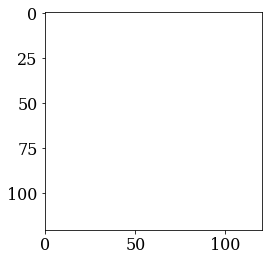

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig = pyplot.figure()
ims = []
for i in range(int(nt/100)) :
    im = plt.imshow(B[:,:,10*i], animated=True)
    ims.append([im])
    
ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True,
                                repeat_delay=1000)
plt.show()

In [115]:
HTML(ani.to_html5_video())